In [1]:
#Introduction of Time Series Analysis

In [2]:
#Time Series Basics
#Statsmodels Python Library
#ETS Models and Decomposition
#EWMA Models
#ARIMA Models

In [4]:
#Time Series Basics -基础概念，一些关于上升趋势，平稳趋势，下降趋势以及周期循环趋势的基本概念

In [5]:
#Statsmodels

In [6]:
#Statsmodels is a python module that allows users to explore data, estimate statistical models, and perform statistical tests.

In [7]:
conda install statsmodels

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Andyl\Anaconda3

  added / updated specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following packages will be UPDATED:

  conda                                        4.8.2-py37_0 --> 4.8.3-py37_0




conda-4.8.3          | 2.8 MB    |            |   0% 
conda-4.8.3          | 2.8 MB    |            |   1% 
conda-4.8.3          | 2.8 MB    | ####3      |  43% 
conda-4.8.3          | 2.8 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kerne

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [61]:
import statsmodels.api as sm

In [62]:
df=sm.datasets.macrodata.load_pandas().data
#sm.datasets是从statsmodels这个model里调取dataset的方法

In [63]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [13]:
print(sm.datasets.macrodata.NOTE)
#.Note 是调取dataset的说明方法

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [64]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [65]:
index=pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))
#statismodels进行time serious analysis的方法

In [66]:
df.index=index

In [67]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


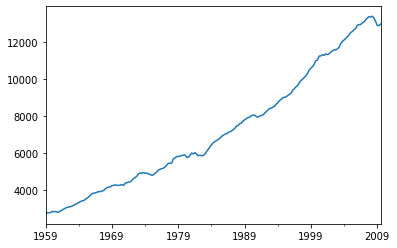

In [68]:
df['realgdp'].plot()

In [69]:
#用SM模型进行trend(趋势)分析
gdp_cycle,gdp_trend=sm.tsa.filters.hpfilter(df['realgdp'])

In [70]:
df['trend']=gdp_trend

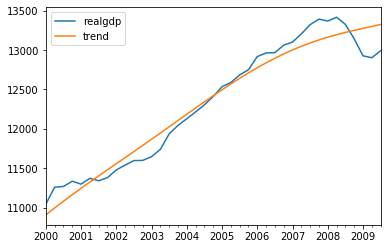

In [71]:
df[['realgdp','trend']]["2000-03-31":].plot()

In [72]:
#ETS Theory

In [73]:
#ETS Models(Error-Trend-Seasonality)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airline=pd.read_csv('airline_passengers.csv',index_col='Month')

In [3]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


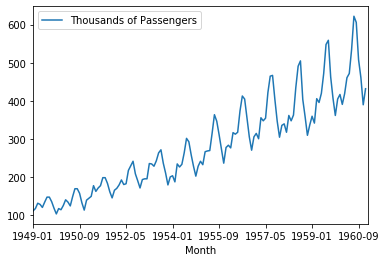

In [4]:
airline.plot()

In [5]:
airline.dropna(inplace=True)

In [6]:
airline.index=pd.to_datetime(airline.index)

In [7]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
result=seasonal_decompose(airline['Thousands of Passengers'],model='multiplicate')

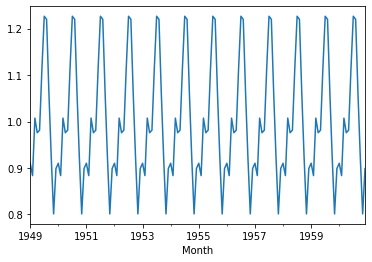

In [10]:
result.seasonal.plot()

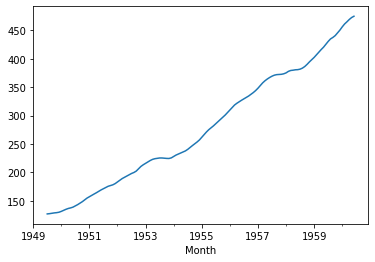

In [11]:
result.trend.plot()

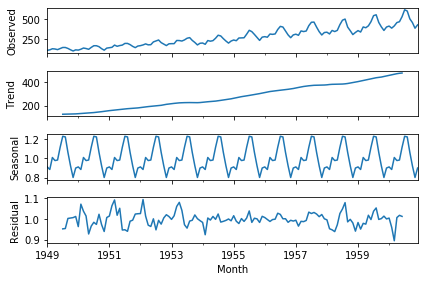

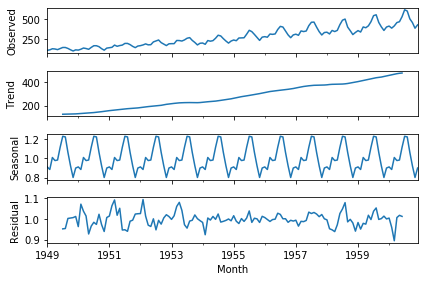

In [120]:
result.plot()

In [74]:
#EWMA Models-指数加权移动平均
#给予近期数据更高权重的平均方法

In [75]:
#EWMA-Exponentially Weighted Moving Averages

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
airline=pd.read_csv('airline_passengers.csv',index_col='Month')
airline

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-09,508.0
1960-10,461.0
1960-11,390.0


In [86]:
airline.dropna(inplace=True)
#这行是drop掉datasets里的missing value

In [87]:
airline

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-08,606.0
1960-09,508.0
1960-10,461.0


In [90]:
airline.index=pd.to_datetime(airline.index)
#将airline的index string格式转化成datetime格式

In [91]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [92]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [93]:
airline['6-month-SMA']=airline['Thousands of Passengers'].rolling(window=6).mean()

In [96]:
airline['12-month-SMA']=airline['Thousands of Passengers'].rolling(window=12).mean()

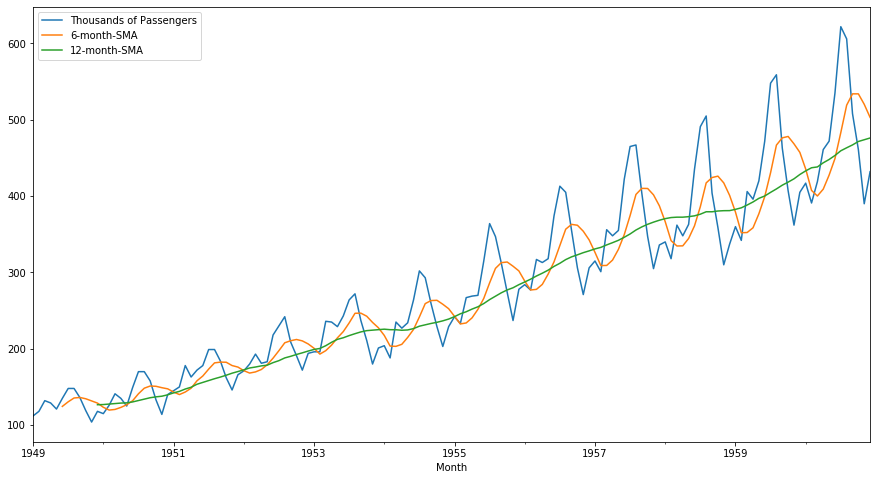

In [99]:
airline.plot(figsize=(15,8))

In [100]:
#Exponentail weighted functions
airline['EWMA-12']=airline['Thousands of Passengers'].ewm(span=12).mean()
#span是跨度

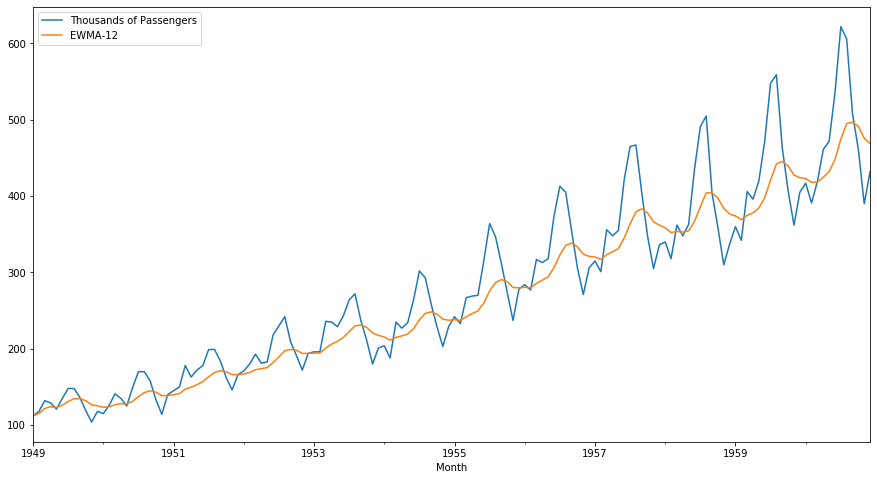

In [102]:
airline[['Thousands of Passengers','EWMA-12']].plot(figsize=(15,8))

In [121]:
#ARIMA Theory（多用于预测数据,predict）

In [122]:
#ARIMA is Auto Regressive Integrated Moving Average Model
#Two type of ARIMA: Non-Seasonal Arima; Seasonal Arima

In [123]:
#AR(p):Auto_Regression, that utilized the dependent relationship between a current observation and observation over a pprevious period
#I(d):Integrated, Differencing of observations.
#MA(q):Moving Average, A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

In [124]:
#Stationary VS. Non-Stationary Data: A stationary series has a constant mean and variance over time.
#ARIMA Models只适用于Stationary model

In [ ]:
#ACF: Auto Correlation计算中 P:The number of lag observations includes in the model. D: The number of times that the raw observations are differenced. Q: THe size of moving average window

In [ ]:
#ARIMA Part1

In [125]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
df=pd.read_csv('monthly-milk-production-pounds-p.csv',index_col='Month')

In [136]:
df.head()

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1962-01,589.0
1962-02,561.0
1962-03,640.0
1962-04,656.0
1962-05,727.0


In [137]:
df.columns=['Milk in Pounds Per Cow']

In [138]:
df.head()

,Milk in Pounds Per Cow
Month,
1962-01,589.0
1962-02,561.0
1962-03,640.0
1962-04,656.0
1962-05,727.0


In [139]:
df.tail()

,Milk in Pounds Per Cow
Month,
1975-09,817.0
1975-10,827.0
1975-11,797.0
1975-12,843.0
Monthly milk production: pounds per cow. Jan 62 ? Dec 75,NaN


In [141]:
df.dropna(inplace=True)

In [143]:
df.index=pd.to_datetime(df.index)

In [144]:
df.head()

,Milk in Pounds Per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [145]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [146]:
df.describe()
#df.describe就可以return关于这个df的一些基础numerical数据

,Milk in Pounds Per Cow
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [147]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds Per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


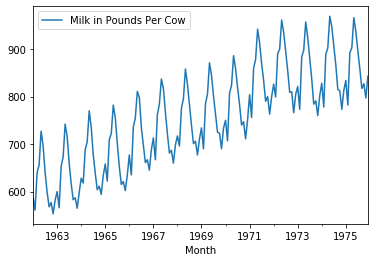

In [148]:
df.plot()
#通过这个表，可以看出牛奶产量是一个seasonal data

In [149]:
time_series=df['Milk in Pounds Per Cow']

In [150]:
type(time_series)

pandas.core.series.Series

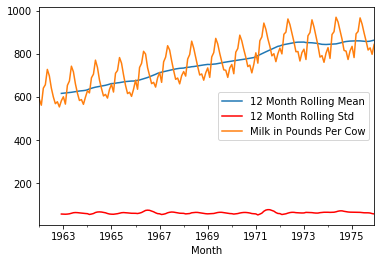

In [159]:
# Rolling公式求Moving average
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std',color='r')
time_series.plot()
plt.legend(loc=0)

In [ ]:
#ETS Model的使用
from statsmodels.tsa.seasonal import seasonal_decompose

In [160]:
decomp=seasonal_decompose(time_series)

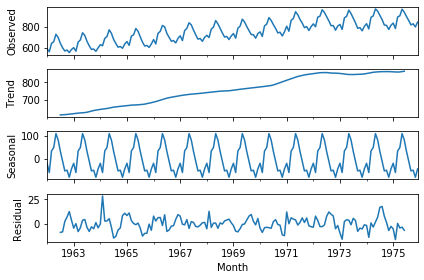

In [162]:
fig=decomp.plot()

In [163]:
#ARIMA Part2

In [164]:
df.head()

,Milk in Pounds Per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [166]:
#How to check the data is stationary or non-stationary
#Null hypothesis is non stationary; Alternative htpothesis is stationary
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Milk in Pounds Per Cow'])

In [168]:
def adf_check(time_series):
    result=adfuller(time_series)
    print("Augmented Dicky-Fullter Test")
    label=['ADF Test Statistic','P-value','# of lags','Mum of Observations used']